# Decision Trees  
_A discrete, supervised, classification model._  

Nested if statements to separate data into categories.  

Decision trees can be used for classification or regression (similar to support vector classifiers).

- Classification: separate, or branch, the data into the categories based on the if statement. If we take a value and it's less than or greater than the threshold, we classify it into a group. 
- Regression: Create boundaries and assign a value to the data based on which boundaries surround it. If a data point sits within a particular range or interval, and estimates the value based on other values in that range.   


## Parts of a Tree  
1. **Node**: Any point where a decision needs to be made. The question part. (Ex. Has legs?)
2. **Edge**: A possible outcome of each node, leading to the next node.  (Ex. "yes" or "no")
3. **Root**: The first node. The very first question you ask. (Ex. "Is alive?")
4. **Leaves**: The end of each branch. Predict the outcome. (Ex. Dog)



# Example

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
iris_data = load_iris()


In [11]:
# use pandas and Seaborn to plot the data
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# makes the species column the actual name of the species
iris['species'] = pd.Series(iris_data.target).apply(lambda x: iris_data.target_names[x])

display(iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


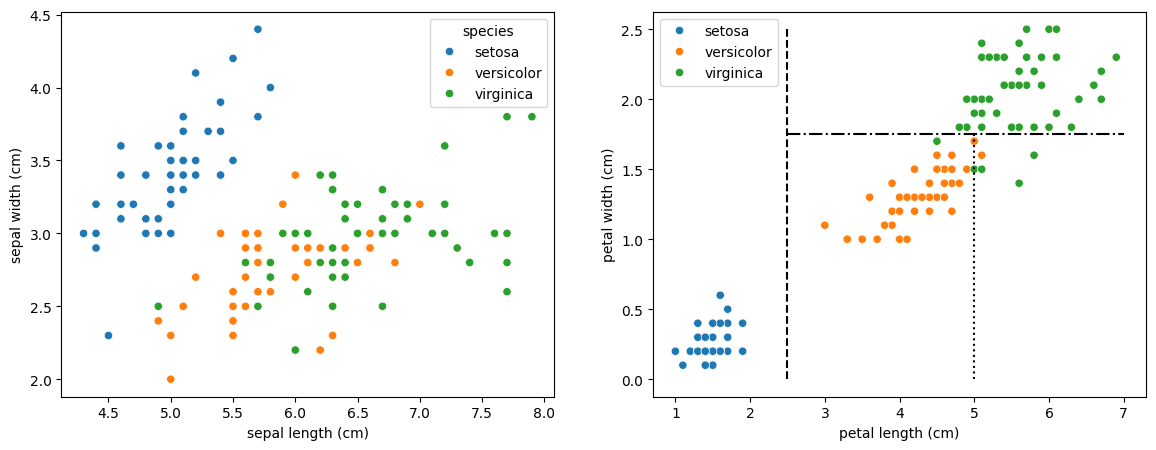

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
sns.scatterplot(data=iris, x='sepal length (cm)', y='sepal width (cm)', hue='species', ax=ax[0])
sns.scatterplot(data=iris, x='petal length (cm)', y='petal width (cm)', hue='species', ax=ax[1])



# if we look at these graphs, we can try to separate the species based on petal lenght and petal width since there are some clear separations there. 
# first good question to ask would be if petal length is less than 2.5

plt.plot([2.5, 2.5],[0, 2.5], color='k', linestyle="--")
plt.legend()

# if petal length < 2.5 , then Setosa! (first leaf)


# Maybe if the petal width is greater than 1.75, then virginica (second leaf)
plt.plot([2.5, 7],[1.75, 1.75], color='k', linestyle="-.")

# If we add another, then we can determine better.
# if petal length > 5, then verginica
# if less, then versicolor
plt.plot([5, 5],[0, 1.75], color='k', linestyle=":")

# leaves us with 2-3 missclassifications



# Where do we make the split?  
A few measures that help the model determine where the split should be:  
- Gini index
- Entropy  
- Information Gain



## Gini Index  

$P_{ik}$ = Percentage of each classification (k) at the (ith) node. What percentage was classified yes or no at a particular node.

$$P_{ik} = \frac{n_k}{n_i}$$

Ex. At the green node, value = [0, 49, 5], [setosa, versicolog, virginica], so $n_i = 54$,$p_{i0} = 0$, $p_{i1} = \frac{49}{54}$ and $p_{i2} = \frac{5}{54}$

To make a good split, we can evaluate it by the percentage of classifications. A classification of [50, 0, 0] would be a perfect split. 

Now we add them up. 


$$ \sum P_{ik} = \sum \frac{n_k}{n_i}^2 $$

Ex. $0 + \frac{49}{54}^2 + \frac{5}{54}^2 = 0.834$  
Ex2. $0 + \frac{50}{50}^2 + 0 = 1$  

We want the flipped index so 0 means no error and 1 means lots of error, So we take 1 - the percent.

<center><h3>Gini Index for i'th node</h3></center>  


$$ G_{i} = 1 - \sum \frac{n_k}{n_i}^2 $$

Gini index can tell us if we need to make a new split or not. For example, if the Gini index is greater than 0.1, then we should do another split.

In [ ]:
# some array of values like [0, 49, 5]
def gini(x):
    result = 1
    for val in x:
        result -= (val / sum(x)) ** 2
    return result
        
print(gini([50, 50, 50])) # greater than 0.75, so we need to split again after this node

print(gini([50, 0, 0])) # less than 0.75, so it's a leaf

print(gini([0, 50, 50])) # greater than 0.75, so we need to split again

print(gini([0, 49, 5])) # greater than 0.75, so we need to split again

print("\n\n")
# gini index of our third split left
# 47 versicolor, 1 verginica
print(gini([0, 47, 1])) # good, so we give it a leaf

# gini index of our third split right
# 4 virginica, 2 versicolor
print(gini([0, 2, 4])) # greater than 0.1, we don't really want to split after this because the number of data points is so low..

        

0.6666666666666665
0.0
0.5
0.1680384087791495



0.040798611111111174
0.4444444444444444


## Entropy

In [6]:
from sklearn.tree import DecisionTreeClassifier